**VISUM 2022 - Explainable AI - Hands on session**
# Uncertainty in White Matter Lesion Segmentation due to Multiple Sclerosis
**written by Vatsal Raina, led by Mara Graziani**
* Ph.D. candidate at University of Cambridge
* Work performed during his internship at Hes-so Valais
* vr311@cam.ac.uk 
* mara.graziani@hevs.ch ; @mormontre

Under the context of the Shifts 2.0 project, launching officially tomorrow 13 July 2022

<figure class="image">
  <img src="https://github.com/maragraziani/InterpretabilityVISUM22/blob/main/images/Logoshifts_full_black.png?raw=1" width="300">
</figure>
The Shifts Project is an international collaboration of academic and industrial researchers dedicated to **studying distributional shift** — one of the biggest challenges in applying machine learning to high-stakes real-world tasks.

The goal of the project is to raise awareness of distributional shift, collect datasets and benchmarks, facilitate cross-disciplinary research, and organize challenges and workshops.

Ideally, machine learning models should generalize well under a range of distributional shifts. If they fail to generalize, these models should indicate this using uncertainty estimates, which enables us to take actions that improve the safety and reliability of the ML system. Techniques that induce invariant or equivariant representations, prevent feature collapse

* More. info https://oatml.cs.ox.ac.uk/blog/2021/08/06/shifts.html



## Content

1. Motivation 
2. Uncertainty Estimation - basics
3. Demo

## Take Aways

*   Total Uncertainty = Data Uncertainty + Model Uncertainty
*   Simplest estimate of total uncertainty is the Entropy of the expected outcome (computed over model ensembles)
*   Model uncertainty can be estimated through mutual information 

## 1. Motivation

*   Deep Learning models show poor generalization to real world datasets [1], little robustness to adversarial examples [2] and dangerous hidden biases [3]
*   In general, the greater the dataset shift between training and deployment data, the poorer the model performance on the unseen dataset. 
* Evaluating the model in terms of the sole performance on in-domain test data is not sufficient [4] 
* Estimating model uncertainty gives further insights on the model performance and it can lead to more actionable decisions in human-machine pairings.

**References**

[1]Arvidsson, I., Overgaard, N. C., Marginean, F.-E., Krzyzanowska, A., Bjartell, A., ̊Astr ̈om, K. & Heyden, A. (2018), Generalization of prostate cancer classification for multiple sites using deep learning, in ‘2018 IEEE 15th International Symposium on Biomedical Imaging (ISBI 2018)’, IEEE, pp. 191–194. 

[2]Nguyen, Anh, Jason Yosinski, and Jeff Clune. "Deep neural networks are easily fooled: High confidence predictions for unrecognizable images." Proceedings of the IEEE conference on computer vision and pattern recognition. 2015.

[3]Zou, James, and Londa Schiebinger. "AI can be sexist and racist—it’s time to make it fair." Nature (2018): 324-326.

[4]Doshi-Velez, Finale, and Been Kim. "Towards a rigorous science of interpretable machine learning." arXiv preprint arXiv:1702.08608 (2017).

* Malinin, Andrey et al. “Shifts: A Dataset of Real Distributional Shift Across Multiple Large-Scale Tasks.” *ArXiv abs/2107.07455 (2021)*
* Koh, Pang Wei, et al. "Wilds: A benchmark of in-the-wild distribution shifts." International Conference on Machine Learning. PMLR, 2021.
* Nair, Tanya, et al. "Exploring uncertainty measures in deep networks for multiple sclerosis lesion detection and segmentation."* Medical image analysis 59 (2020): 101557.*




## 2. Uncertainty Estimation Basics

Consider the following example (credits: TwinEd Productions https://www.youtube.com/watch?v=Osju20L6Z3I)

![picture](https://github.com/maragraziani/InterpretabilityVISUM22/blob/main/images/basics_uncertainty.png?raw=true)

In the first case, the model has high certainty about the prediction. 

In the second case, the distribution on the output classes is quite uniform, and this characterizes a high uncertainty of the model on the predicted class. 

When we have a single model, we can only estimate data uncertainty.

#### A common way to estimate total uncertainty is through model ensembles. 

* Multiple models with identical architectures are trained with different initialization seeds on the same training data and tested on the same image. 
* For N models in the ensemble, we obtain N different softmax outcomes

#### From the ensemble, we can compute multiple uncertainty estimates

**Entropy measures of uncertainty** 

* MEAN Uncertainty = Entropy (expected prediction of ensemble) - measure of total uncertainty
```
def entropy_of_expected(probs):
    [...]
    return np.sum(mean_probs * log_probs, axis=-1)
```
* Expected Entropy = Mean (individual models entropies) - measure of data uncertainty
```
def expected_entropy(probs):
  [...]
  return np.mean(np.sum(probs * log_probs, axis=-1), axis=0)
```

**Mutual Information**
* We can fit a Gaussian distribution on top of the ensemble predictions on the simplex. The variance of the distribution is also indicative of model uncertainty. 
* The Mutual Information (MI) is computed between the probability distributions of each ensemble outcome. 
* Mutual information is computed as the difference between our total uncertainty estimate (entropy of expected) and our measure of data uncertainty (expected entropy) - measure of model uncertainty
```
def mutual_information(eoe, ee):
  [...]
  mutual_info = eoe - exe
  return mutual_info
```


## 3. Demonstration on White Matter Lesion Segmentation for MRI of Multiple Sclerosis 

#### [DEMO] Installation and set up

In [ ]:
# Install requirements
!pip install numpy
!pip install matplotlib
!pip install torch
!pip install monai[all]==0.3.0

     |████████████████████████████████| 298 kB 6.8 MB/s 
     |████████████████████████████████| 175 kB 54.4 MB/s 
     |████████████████████████████████| 70.6 MB 8.6 kB/s 
     |████████████████████████████████| 54.5 MB 48 kB/s 
     |████████████████████████████████| 95.3 MB 36 kB/s 
     |████████████████████████████████| 16.6 MB 23.6 MB/s 
     |████████████████████████████████| 20.3 MB 86.8 MB/s 
     |████████████████████████████████| 15.0 MB 21.6 MB/s 


In [ ]:
# Load pretrained models from https://drive.google.com/file/d/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU" -O models.tar.gz && rm -rf /tmp/cookies.txt
!tar -xzvf models.tar.gz

--2022-05-17 11:06:54--  https://docs.google.com/uc?export=download&confirm=t&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU
Resolving docs.google.com (docs.google.com)... 142.250.101.101, 142.250.101.100, 142.250.101.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5jblaqkglq9a960ke0ja3ipuc44sekf0/1652785575000/17412464615910489214/*/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU?e=download [following]
--2022-05-17 11:06:54--  https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5jblaqkglq9a960ke0ja3ipuc44sekf0/1652785575000/17412464615910489214/*/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU?e=download
Resolving doc-04-b4-docs.googleusercontent.com (doc-04-b4-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-04-b4-docs.googleusercontent.com (doc-

In [ ]:
# Load development data from https://drive.google.com/file/d/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK" -O data.tar.gz && rm -rf /tmp/cookies.txt
!tar -xzvf data.tar.gz

--2022-05-17 11:07:00--  https://docs.google.com/uc?export=download&confirm=t&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK
Resolving docs.google.com (docs.google.com)... 142.250.101.101, 142.250.101.102, 142.250.101.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8h273ofd82i7o6db3ompjg9ui06i086/1652785575000/17412464615910489214/*/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK?e=download [following]
--2022-05-17 11:07:00--  https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8h273ofd82i7o6db3ompjg9ui06i086/1652785575000/17412464615910489214/*/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK?e=download
Resolving doc-0s-b4-docs.googleusercontent.com (doc-0s-b4-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0s-b4-docs.googleusercontent.com (doc-

In [ ]:
# Import libraries
import os
from glob import glob
import re
import numpy as np
import torch
#
from monai.config import print_config
from monai.data import CacheDataset, DataLoader, Dataset
from monai.inferers import sliding_window_inference
from monai.losses import DiceLoss, GeneralizedDiceLoss, TverskyLoss
from monai.metrics import compute_meandice, DiceMetric
from monai.networks.layers import Norm
from monai.networks.nets import UNet
from monai.transforms import (
    AddChanneld,Compose,CropForegroundd,LoadNiftid,Orientationd,RandCropByPosNegLabeld,
    ScaleIntensityRanged,Spacingd,ToTensord,ConcatItemsd,NormalizeIntensityd, RandFlipd,
    RandRotate90d,RandShiftIntensityd,RandAffined,RandSpatialCropd, AsDiscrete, Activations)
from monai.utils import first, set_determinism
from monai.data import write_nifti, create_file_basename, NiftiDataset

#### [DEMO] Preprocess the data 

In [ ]:
path_data = "dev_in"
path_gts = "dev_in"
flair = sorted(glob(os.path.join(path_data, "*FLAIR.nii.gz")),
              key=lambda i: int(re.sub('\D', '', i)))  # Collect all flair images sorted
segs = sorted(glob(os.path.join(path_gts, "*gt.nii")),
              key=lambda i: int(re.sub('\D', '', i)))
N = (len(flair)) # Number of subjects for training/validation, by default using all subjects in the folder
indices = np.arange(N)
v=indices[:]

test_files=[]
for j in v:
    test_files = test_files + [{"image": fl, "label": seg} for fl, seg in zip(flair[j:j+1], segs[j:j+1])]

print("Testing cases:", len(test_files))
val_transforms = Compose(
[
    LoadNiftid(keys=["image", "label"]),
    AddChanneld(keys=["image","label"]),
    Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
    NormalizeIntensityd(keys=["image"], nonzero=True),
    ToTensord(keys=["image", "label"]),
]
)

val_ds = CacheDataset(data=test_files, transform=val_transforms, cache_rate=0.5, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=0)

Testing cases: 7


Load and cache transformed data: 100%|██████████| 3/3 [00:10<00:00,  3.59s/it]


#### [DEMO] Define functions to compute uncertainty measures

In [ ]:
"""
Implementation of standard predictive uncertainty measures for image segmentation
"""

def entropy_of_expected(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: array [num_voxels_X, num_voxels_Y, num_voxels_Z,]
    """
    mean_probs = np.mean(probs, axis=0)
    log_probs = -np.log(mean_probs + epsilon)
    return np.sum(mean_probs * log_probs, axis=-1)

def expected_entropy(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: array [num_voxels_X, num_voxels_Y, num_voxels_Z,]
    """
    log_probs = -np.log(probs + epsilon)
    return np.mean(np.sum(probs * log_probs, axis=-1), axis=0)


def ensemble_uncertainties_classification(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: Dictionary of uncertainties
    """
    mean_probs = np.mean(probs, axis=0)
    mean_lprobs = np.mean(np.log(probs + epsilon), axis=0)
    conf = np.max(mean_probs, axis=-1)

    eoe = entropy_of_expected(probs, epsilon)
    exe = expected_entropy(probs, epsilon)

    mutual_info = eoe - exe

    epkl = -np.sum(mean_probs * mean_lprobs, axis=-1) - exe

    uncertainty = {'confidence': -1 * conf,
                   'entropy_of_expected': eoe,
                   'expected_entropy': exe,
                   'mutual_information': mutual_info,
                   'epkl': epkl,
                   'reverse_mutual_information': epkl - mutual_info
                   }

    return uncertainty

#### [DEMO] Run inference and compute estimates over ensemble of 5 models

---



In [ ]:
import torch
from scipy import ndimage

# Threshold to convert probabilistic prediction into binary segmentation mask
th = 0.35
# Set number of models in ensemble
K = 5
root_dir = "baseline/"


# Set device
def get_default_device():
    if torch.cuda.is_available():
        print("Got CUDA!")
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()

models = []
for i in range(K):
    models.append(UNet(dimensions=3,in_channels=1, out_channels=2,channels=(32, 64, 128, 256, 512),
                strides=(2, 2, 2, 2),num_res_units=0).to(device))
  
act = Activations(softmax=True)

for i, model in enumerate(models):
    model.load_state_dict(torch.load(root_dir + "seed" + str(i+1) + "/Best_model_finetuning.pth", map_location=device))
    model.eval()

all_inputs = []
all_predictions = []
all_groundTruths = []
all_uncs = []

with torch.no_grad():
    for patient_count, batch_data in enumerate(val_loader):
        print("Patient num: ", patient_count)
        inputs, gt  = (
                batch_data["image"].to(device),#.unsqueeze(0),
                  batch_data["label"].type(torch.LongTensor).to(device),)#.unsqueeze(0),)
        roi_size = (96, 96, 96)
        sw_batch_size = 4

        all_outputs = []
        for model in models:
            outputs = sliding_window_inference(inputs, roi_size, sw_batch_size, model, mode='gaussian')
            outputs_o = (act(outputs))
            outputs = act(outputs).cpu().numpy()
            outputs = np.squeeze(outputs[0,1])
            all_outputs.append(outputs)
        all_outputs = np.asarray(all_outputs)
        outputs = np.mean(all_outputs, axis=0)

        # Get all uncertainties
        uncs = ensemble_uncertainties_classification( np.concatenate( (np.expand_dims(all_outputs, axis=-1), np.expand_dims(1.-all_outputs, axis=-1)), axis=-1) )
        
        outputs[outputs>th]=1
        outputs[outputs<th]=0
        seg= np.squeeze(outputs)

        val_labels = gt.cpu().numpy()
        gt = np.squeeze(val_labels)

        """
        Remove connected components smaller than 10 voxels
        """
        l_min = 9
        labeled_seg, num_labels = ndimage.label(seg)
        label_list = np.unique(labeled_seg)
        num_elements_by_lesion = ndimage.labeled_comprehension(seg,labeled_seg,label_list,np.sum,float, 0)

        seg2 = np.zeros_like(seg)
        for l in range(len(num_elements_by_lesion)):
            if num_elements_by_lesion[l] > l_min:
        # assign voxels to output
                current_voxels = np.stack(np.where(labeled_seg == l), axis=1)
                seg2[current_voxels[:, 0],
                    current_voxels[:, 1],
                    current_voxels[:, 2]] = 1
        seg=np.copy(seg2)

        # Get the Dice score
        im_sum = np.sum(seg) + np.sum(gt)
        if im_sum == 0:
            value = 1.0
            dsc = value
        else:
            value = (np.sum(seg[gt==1])*2.0) / (np.sum(seg) + np.sum(gt))
            dsc = value.sum().item()
        print("Dice score:", dsc)

        all_predictions.append(seg)
        all_groundTruths.append(gt)
        all_uncs.append(uncs)
        all_inputs.append(np.squeeze(inputs.cpu().numpy()))

        # For the sake of the investigation of interpretability, we only look at the results for the first patient
        break

Patient num:  0
Dice score: 0.8380670829419241


#### [DEMO] Visualise predictions and uncertainty maps

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

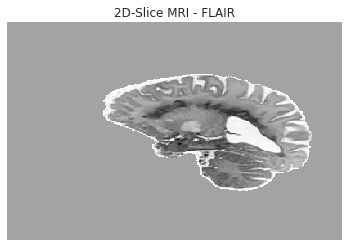

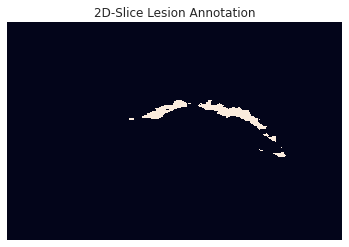

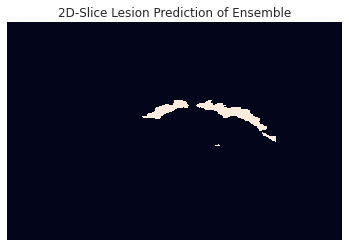

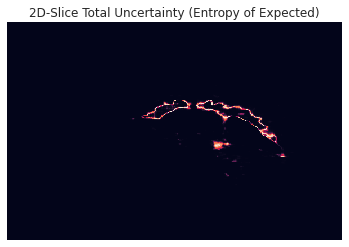

<Figure size 432x288 with 0 Axes>

In [ ]:
# Select our choice of uncertainty measure
unc_measure = "entropy_of_expected"
# Plot the first ground truth and corresponding prediction at a random slice
gt, pred, unc, inp = all_groundTruths[0], all_predictions[0], all_uncs[0][unc_measure], all_inputs[0]
slice_num=100
# eliminate uncertainty scores outside brain region
unc[inp==0] = 0
gt_slice, pred_slice, unc_slice, inp_slice = np.rot90(gt[slice_num,:,:], 1), np.rot90(pred[slice_num,:,:], 1), np.rot90(unc[slice_num,:,:], 1), np.rot90(inp[slice_num,:,:], 1)


ax = sns.heatmap(inp_slice, cbar=False, cmap="Greys", xticklabels=False, yticklabels=False)
plt.title("2D-Slice MRI - FLAIR")
plt.show()
plt.clf()

ax = sns.heatmap(gt_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.title("2D-Slice Lesion Annotation")
plt.show()
plt.clf()

sns.heatmap(pred_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.title("2D-Slice Lesion Prediction of Ensemble")
plt.show()
plt.clf()

sns.heatmap(unc_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.title("2D-Slice Total Uncertainty (Entropy of Expected)")
plt.show()
plt.clf()